In [1]:
# importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'darkgrid')

iris = pd.read_csv('iris.csv')
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.describe()

# observation: no need for standardization

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

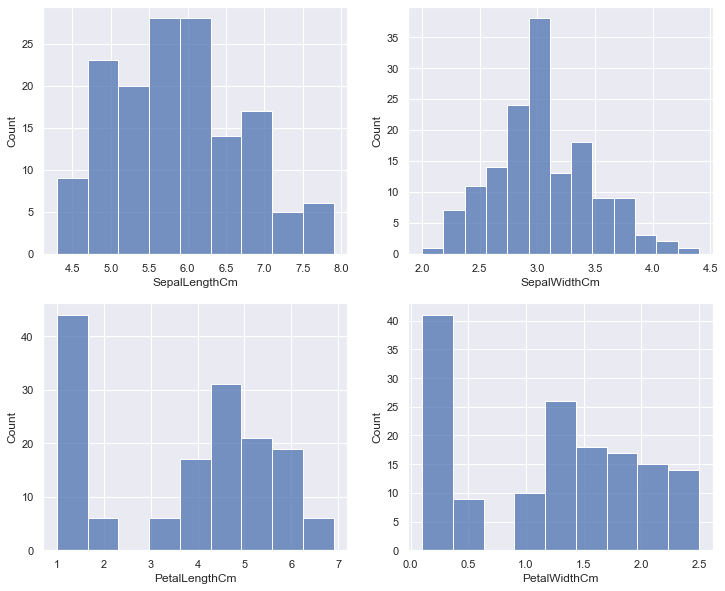

In [3]:
# visualization with histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(ax=axes[0,0], x=iris['SepalLengthCm'])
sns.histplot(ax=axes[0,1], x=iris['SepalWidthCm'])
sns.histplot(ax=axes[1,0], x=iris['PetalLengthCm'])
sns.histplot(ax=axes[1,1], x=iris['PetalWidthCm'])

# observation: SepalLength and SepalWidth have normal distribution 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

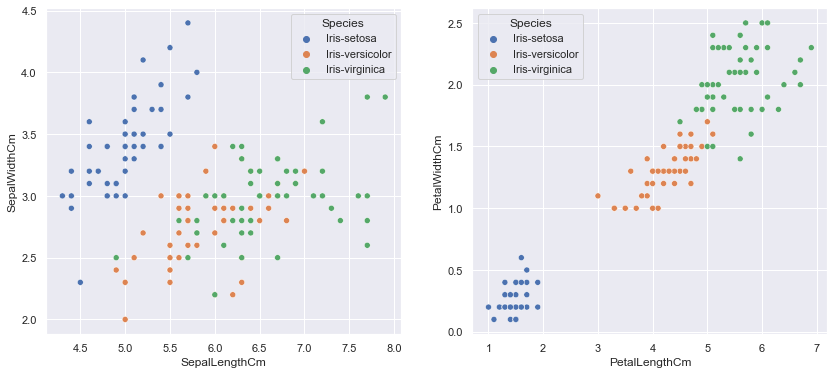

In [4]:
# visualization with scatterplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=iris, ax=axes[0], x='SepalLengthCm',y='SepalWidthCm', hue='Species')
sns.scatterplot(data=iris, ax=axes[1], x='PetalLengthCm',y='PetalWidthCm', hue='Species')

# observation: petal width and length are higly correlated

In [5]:
# modeling
# import > instantiate > fit > predict
from sklearn.model_selection import train_test_split
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediction
pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:15]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [6]:
# accuracy
knn.score(X_test, y_test)

0.9777777777777777

C:\Users\Maggie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


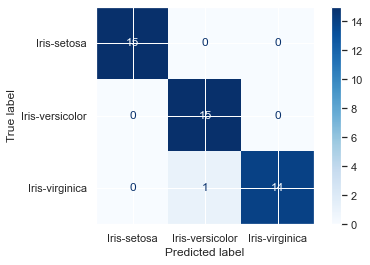

In [7]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [8]:
# cross validation
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
cv_scores.mean()

0.9533333333333334

In [9]:
# tuning the hyperparameter
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 10)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)
knn_gscv.best_params_

{'n_neighbors': 4}

In [10]:
knn_final = KNeighborsClassifier(n_neighbors=4)
knn_final.fit(X, y)
y_pred=knn.predict(X)
knn_final.score(X, y)

0.9733333333333334

In [11]:
# predicting with new data
new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1, -1)
knn_final.predict(np.array(new_data))

C:\Users\Maggie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)